In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, Lars
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.metrics import r2_score, roc_auc_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC, SVR

In [4]:
df_3= pd.read_csv('df_3.csv')

In [5]:
pd.set_option('display.max_columns', None)
df_3

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump
0,2019-12-24 21:37:31.990000010,-27.717649,-51.099109,2.331319,0,0,1,1,2.790421,1.998929,1.641167,1.275114,0.811988,-1.099936,0.299874,11.491370,11.547786,0.579834,-0.368754,0.549316,0.879736,11.669802,11.422858,11.394689,11.551435,1,0,0,0
1,2019-12-24 21:37:32.000000000,-27.717628,-51.099133,2.598775,0,0,1,1,2.790421,2.331319,1.998929,1.641167,1.275114,-1.064821,0.420781,11.501346,11.558194,0.671387,0.689189,0.760396,1.226354,11.732349,11.489835,11.613470,11.572774,1,0,0,0
2,2019-12-24 21:37:32.009999990,-27.717628,-51.099133,2.598775,0,0,1,1,2.790421,2.331319,1.998929,1.641167,1.275114,-1.077391,0.404620,11.465034,11.522651,-0.076294,0.679016,0.638326,0.935063,11.375485,11.514738,11.577828,11.190447,1,0,0,0
3,2019-12-24 21:37:32.019999981,-27.717628,-51.099133,2.598775,0,0,1,1,2.790421,2.331319,1.998929,1.641167,1.275114,-1.058437,0.438937,11.373855,11.431427,0.239054,0.002543,0.709534,0.748727,11.236911,11.420281,11.220329,11.553266,1,0,0,0
4,2019-12-24 21:37:32.029999971,-27.717628,-51.099133,2.598775,0,0,1,1,2.790421,2.331319,1.998929,1.641167,1.275114,-1.015541,0.408710,11.208355,11.261687,0.038147,0.269572,0.567118,0.629085,11.284415,11.382235,11.468626,11.480008,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95196,2019-12-24 21:53:23.950000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388,1,0,0,0
95197,2019-12-24 21:53:23.960000038,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465,1,0,0,0
95198,2019-12-24 21:53:23.970000029,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020,1,0,0,0
95199,2019-12-24 21:53:23.980000019,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307,1,0,0,0


In [6]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95201 entries, 0 to 95200
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              95201 non-null  object 
 1   latitude               95201 non-null  float64
 2   longitude              95201 non-null  float64
 3   speed                  95201 non-null  float64
 4   unpaved_road           95201 non-null  int64  
 5   cobblestone_road       95201 non-null  int64  
 6   asphalt_road           95201 non-null  int64  
 7   no_speed_bump          95201 non-null  int64  
 8   Speed_Target           95201 non-null  float64
 9   speed_t-1              95201 non-null  float64
 10  speed_t-2              95201 non-null  float64
 11  speed_t-3              95201 non-null  float64
 12  speed_t-4              95201 non-null  float64
 13  acc_x_avg              95201 non-null  float64
 14  acc_y_avg              95201 non-null  float64
 15  ac

#### Para el objetivo de mi proyecto es predecir la velocidad, que es una variable continua, para esto y con e objetivo de generalizar nuestro modelo voy a mezclar los dataframes de los tres recorridos

In [7]:
df_2= pd.read_csv('df_2.csv')
df_1= pd.read_csv('df_1.csv')

In [8]:
df_1['Speed_bump_target'] = df_1['speed_bump'].shift(-500) 
df_2['Speed_bump_target'] = df_2['speed_bump'].shift(-500) 
df_3['Speed_bump_target'] = df_3['speed_bump'].shift(-500) 

In [9]:
df_1_c = df_1.copy()
df_2_c = df_2.copy()
df_3_c = df_3.copy()
df = pd.concat([df_1_c,df_2_c,df_3_c], axis = 0)
df = df.reset_index(drop = True)

In [10]:
df

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Speed_bump_target
0,2019-12-24 20:21:38.990000010,-27.717755,-51.098985,3.236828,0,0,1,1,11.802369,3.236828,2.457934,1.793759,0.717635,-0.731628,0.106342,11.219029,11.243363,-0.719706,2.052307,-5.734762,6.133305,11.640243,11.500847,11.034913,11.178157,1,0,0,0,0.0
1,2019-12-24 20:21:39.000000000,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.693321,-0.030127,11.040661,11.062450,-0.498454,1.902262,-3.115336,3.684071,11.655013,11.715343,11.057294,11.239022,1,0,0,0,0.0
2,2019-12-24 20:21:39.009999990,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.829192,0.115919,11.173141,11.204466,-0.139872,1.258850,-2.545675,2.843365,11.604243,11.809643,11.396549,11.211858,1,0,0,0,0.0
3,2019-12-24 20:21:39.019999981,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.963666,0.234233,11.747150,11.788938,-0.310262,0.890096,-0.600179,1.117474,11.444361,11.484994,11.546067,11.694704,1,0,0,0,0.0
4,2019-12-24 20:21:39.029999971,-27.717683,-51.099067,4.299495,0,0,1,1,11.802369,3.236828,3.236828,2.457934,1.793759,-0.666985,-0.276929,11.051834,11.075405,-1.070658,-0.384013,0.910441,1.456941,11.456193,11.666853,11.355733,11.365829,1,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,2019-12-24 21:53:23.950000048,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-0.912989,-1.304042,10.935516,11.050773,0.859578,2.380371,-0.091553,2.532474,11.142183,11.236468,11.084578,11.219388,1,0,0,0,NaN
344199,2019-12-24 21:53:23.960000038,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.274114,-1.855506,11.222022,11.445525,-0.605265,-1.022339,-0.523885,1.298452,11.493950,11.254312,11.759345,12.291465,1,0,0,0,NaN
344200,2019-12-24 21:53:23.970000029,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.363099,-1.665965,11.078370,11.285556,-0.986735,-2.176921,-0.597636,2.463696,11.023920,11.491217,11.567065,11.503020,1,0,0,0,NaN
344201,2019-12-24 21:53:23.980000019,-27.717676,-51.099197,7.512348,0,0,1,1,1.368818,8.633176,9.115602,11.253605,12.879133,-1.038285,-1.295263,11.232597,11.354601,0.287374,-0.864665,-0.559489,1.069232,11.422023,11.542409,11.175456,10.719307,1,0,0,0,NaN


In [11]:
df.isnull().sum()

timestamp                   0
latitude                    0
longitude                   0
speed                       0
unpaved_road                0
cobblestone_road            0
asphalt_road                0
no_speed_bump               0
Speed_Target                0
speed_t-1                   0
speed_t-2                   0
speed_t-3                   0
speed_t-4                   0
acc_x_avg                   0
acc_y_avg                   0
acc_z_avg                   0
acc_magnitude_avg           0
gyro_x_avg                  0
gyro_y_avg                  0
gyro_z_avg                  0
gyro_magnitude_avg          0
acc_magnitude_avg_t-1       0
acc_magnitude_avg_t-2       0
acc_magnitude_avg_t-3       0
acc_magnitude_avg_t-4       0
good_road                   0
regular_road                0
bad_road                    0
speed_bump                  0
Speed_bump_target        1500
dtype: int64

In [12]:
df.fillna(0, inplace = True)

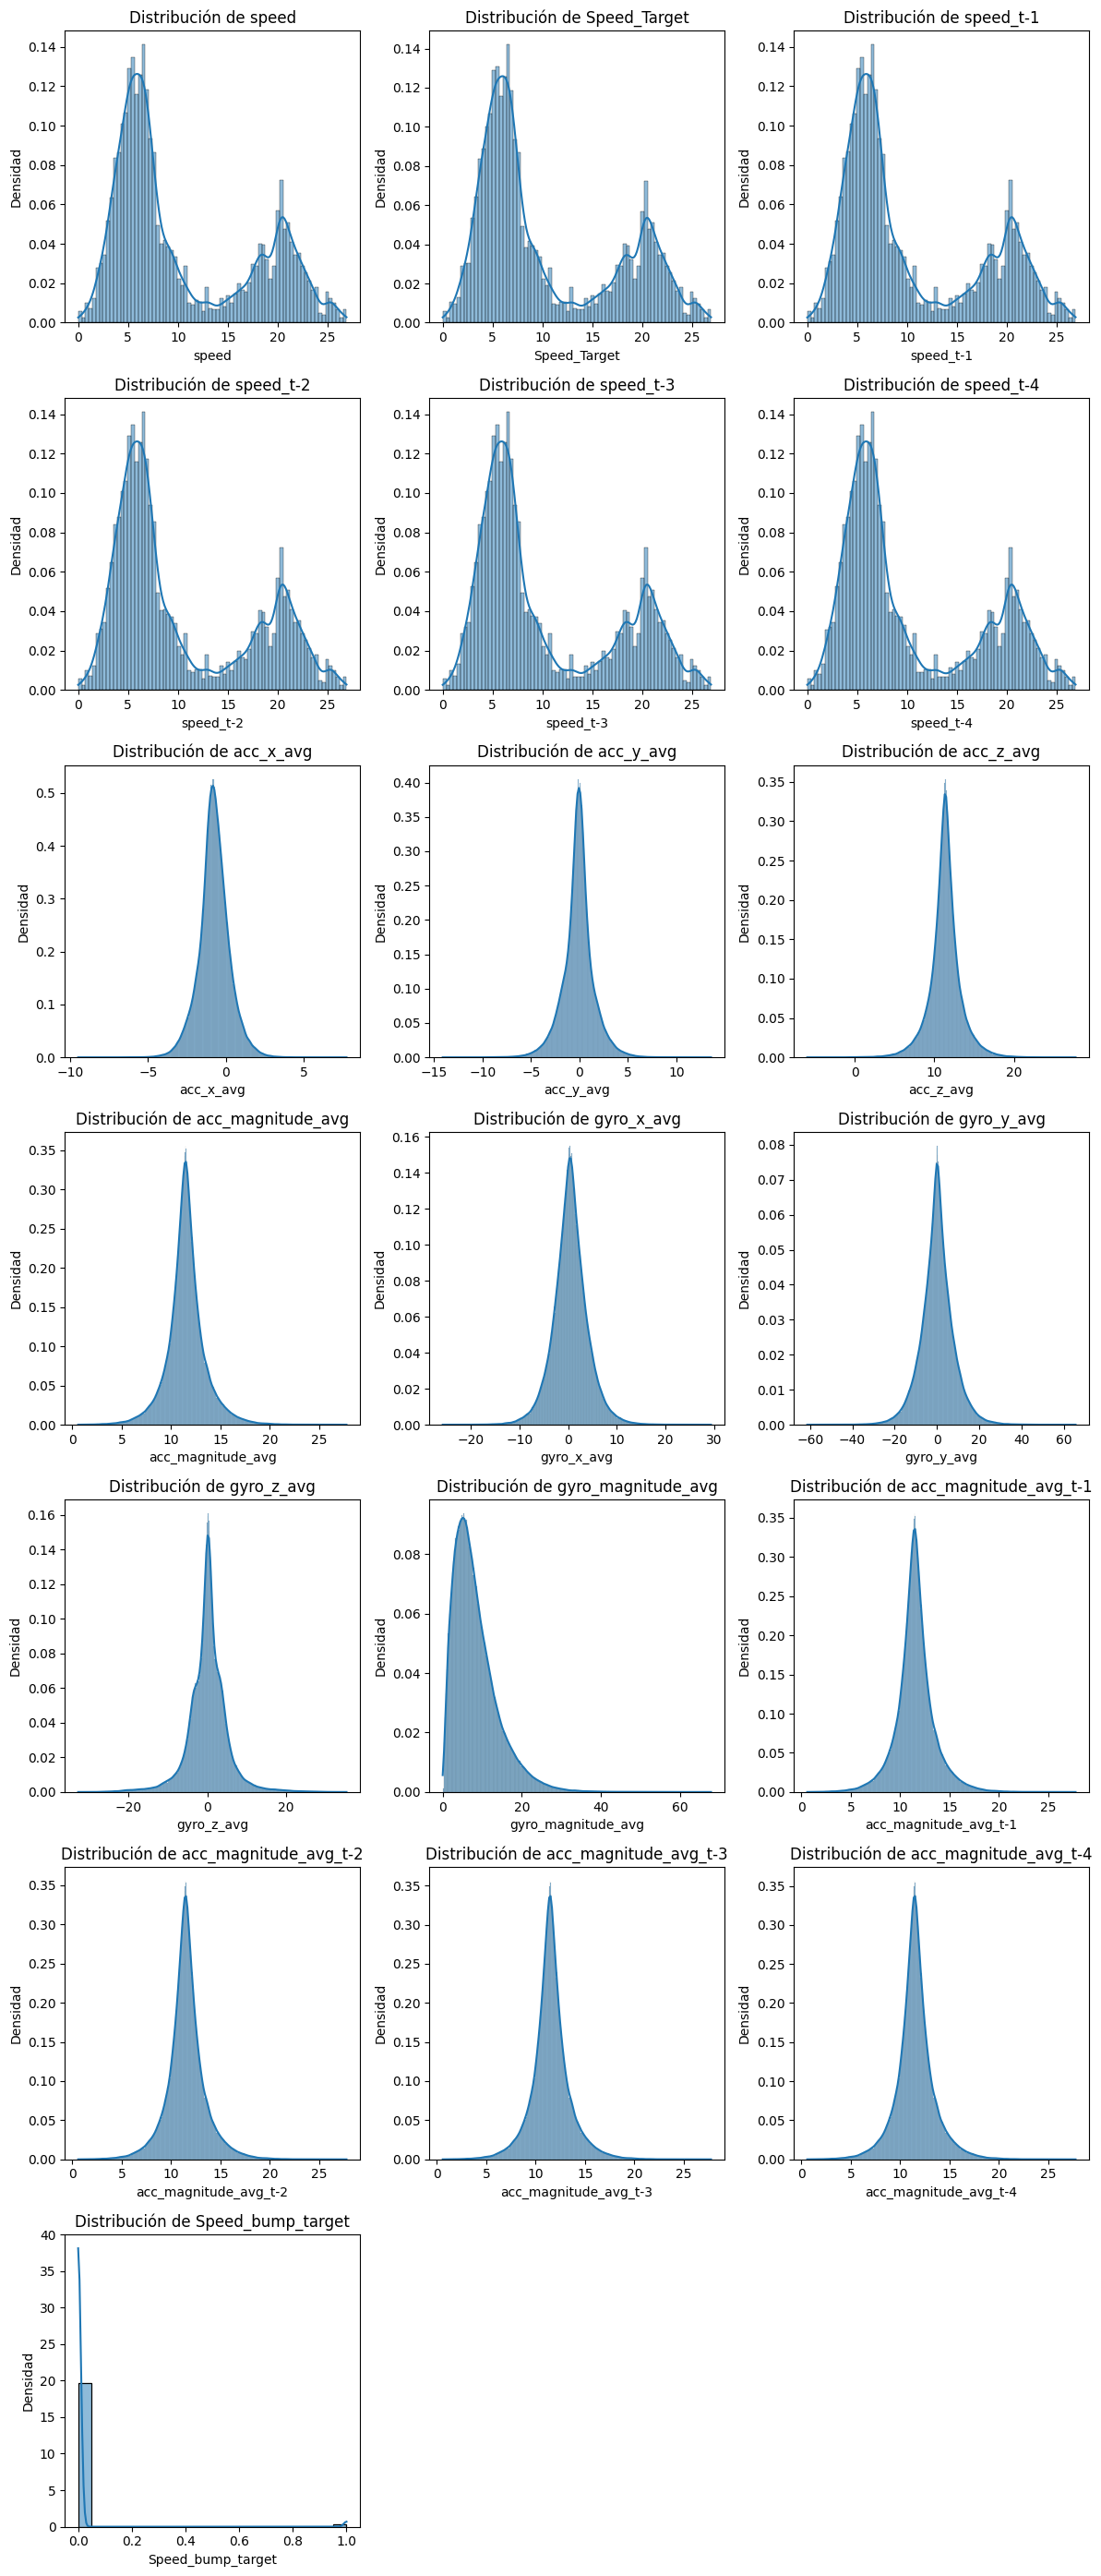

In [13]:
list_descart = ['timestamp','latitude','longitude','good_road','regular_road','bad_road','speed_bump','unpaved_road','cobblestone_road'
               ,'asphalt_road','no_speed_bump']
aux = df.drop(columns = list_descart)
list_columns = aux.columns

rows  = (len(list_columns) // 3) + (len(list_columns) % 3 > 0)
plt.figure(figsize = (12,rows*4))

for i, var in enumerate(list_columns, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[var], kde = True, stat = 'density')
    plt.plot(linewidth = 2)
    plt.title(f'Distribución de {var}')
    plt.xlabel(var)
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

    

In [14]:
df.columns

Index(['timestamp', 'latitude', 'longitude', 'speed', 'unpaved_road',
       'cobblestone_road', 'asphalt_road', 'no_speed_bump', 'Speed_Target',
       'speed_t-1', 'speed_t-2', 'speed_t-3', 'speed_t-4', 'acc_x_avg',
       'acc_y_avg', 'acc_z_avg', 'acc_magnitude_avg', 'gyro_x_avg',
       'gyro_y_avg', 'gyro_z_avg', 'gyro_magnitude_avg',
       'acc_magnitude_avg_t-1', 'acc_magnitude_avg_t-2',
       'acc_magnitude_avg_t-3', 'acc_magnitude_avg_t-4', 'good_road',
       'regular_road', 'bad_road', 'speed_bump', 'Speed_bump_target'],
      dtype='object')

In [15]:
df.describe([0.01,.25,.50,.75,.99])

,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Speed_bump_target
count,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000
mean,-27.698041,-51.118597,10.422634,0.288042,0.315334,0.396626,0.982368,10.413801,10.418880,10.413687,10.406927,10.398083,-0.750464,-0.110174,11.354224,11.535995,0.461426,0.158765,0.116687,8.295994,11.535973,11.536022,11.536008,11.536006,0.389985,0.451751,0.191532,0.017635,0.017635
std,0.011845,0.009117,6.912124,0.452852,0.464650,0.489198,0.131610,6.918850,6.914567,6.917612,6.921376,6.925807,0.985516,1.590708,1.971791,1.950405,3.587422,7.842904,5.054806,5.599984,1.950387,1.950353,1.950280,1.950208,0.487747,0.497667,0.393507,0.131621,0.131621
min,-27.718709,-51.132691,0.006364,0.000000,0.000000,0.000000,0.000000,0.006364,0.006364,0.006364,0.006364,0.006364,-9.491413,-14.089079,-5.956774,0.593696,-25.774638,-61.350505,-32.857259,0.034497,0.593696,0.593696,0.593696,0.593696,0.000000,0.000000,0.000000,0.000000,0.000000
1%,-27.718536,-51.132245,1.496435,0.000000,0.000000,0.000000,0.000000,1.401607,1.496435,1.496435,1.496435,1.494138,-3.287837,-4.477153,5.788781,6.240693,-8.875529,-20.334880,-15.591888,0.806266,6.240693,6.240693,6.240693,6.240693,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-27.710237,-51.126446,5.204611,0.000000,0.000000,0.000000,1.000000,5.189742,5.201862,5.190472,5.185926,5.178451,-1.291672,-0.872886,10.442311,10.595172,-1.553853,-4.089355,-2.225240,4.266314,10.595190,10.595296,10.595482,10.595584,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-27.692361,-51.120920,7.182089,0.000000,0.000000,0.000000,1.000000,7.172958,7.172958,7.165563,7.160047,7.145476,-0.763750,-0.081802,11.359489,11.486204,0.422160,0.137329,0.178019,7.048625,11.486246,11.486472,11.486406,11.486486,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-27.688792,-51.111087,17.626370,1.000000,1.000000,1.000000,1.000000,17.626370,17.626370,17.626370,17.626370,17.626370,-0.188942,0.657009,12.274074,12.424610,2.443949,4.361471,2.507528,10.972132,12.424490,12.424462,12.424353,12.424208,1.000000,1.000000,0.000000,0.000000,0.000000
99%,-27.682396,-51.099450,25.421959,1.000000,1.000000,1.000000,1.000000,25.421959,25.421959,25.421959,25.421959,25.421959,1.816996,4.215790,16.897477,17.219071,10.035197,21.166433,15.449473,26.518594,17.219071,17.219071,17.219071,17.219071,1.000000,1.000000,1.000000,1.000000,1.000000
max,-27.681820,-51.098985,26.874480,1.000000,1.000000,1.000000,1.000000,26.874480,26.874480,26.874480,26.874480,26.874480,7.751028,13.566145,27.720466,27.760222,29.352824,65.658569,35.400391,67.832126,27.760222,27.760222,27.760222,27.760222,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
df['Speed_bump_target'].value_counts()

Speed_bump_target
0.0    338133
1.0      6070
Name: count, dtype: int64

In [17]:
df['speed_bump'].value_counts()

speed_bump
0    338133
1      6070
Name: count, dtype: int64

### Modelo con variable Discreta

In [18]:
df_mc = df.drop(columns = ['Speed_Target']).copy()

In [19]:
df_mc['Speed_bump_target'].value_counts()/len(df_mc)

Speed_bump_target
0.0    0.982365
1.0    0.017635
Name: count, dtype: float64

In [20]:
df_mc['Speed_bump_target'].value_counts()

Speed_bump_target
0.0    338133
1.0      6070
Name: count, dtype: int64

In [21]:
df_target_0 = df_mc[df_mc['Speed_bump_target'] == 0]
df_target_1 = df_mc[df_mc['Speed_bump_target'] == 1]
subsample = df_target_0.sample(frac = 0.16, random_state =42)
df_mc_sub = pd.concat([df_target_1, subsample])

In [22]:
df_mc_sub['Speed_bump_target'].value_counts()/len(df_mc_sub)

Speed_bump_target
0.0    0.899121
1.0    0.100879
Name: count, dtype: float64

In [23]:
df_mc_sub.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60171 entries, 19122 to 53909
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              60171 non-null  object 
 1   latitude               60171 non-null  float64
 2   longitude              60171 non-null  float64
 3   speed                  60171 non-null  float64
 4   unpaved_road           60171 non-null  int64  
 5   cobblestone_road       60171 non-null  int64  
 6   asphalt_road           60171 non-null  int64  
 7   no_speed_bump          60171 non-null  int64  
 8   speed_t-1              60171 non-null  float64
 9   speed_t-2              60171 non-null  float64
 10  speed_t-3              60171 non-null  float64
 11  speed_t-4              60171 non-null  float64
 12  acc_x_avg              60171 non-null  float64
 13  acc_y_avg              60171 non-null  float64
 14  acc_z_avg              60171 non-null  float64
 15  acc

In [24]:
df_mc_sub

,timestamp,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Speed_bump_target
19122,2019-12-24 20:24:50.210000038,-27.688768,-51.119787,11.188980,0,0,1,1,12.876601,14.176493,14.768132,15.263713,-0.035115,-1.688311,10.108718,10.248796,0.295003,0.872294,-1.721700,1.952479,11.241063,11.205228,12.306759,11.419081,1,0,0,0,1.0
19123,2019-12-24 20:24:50.220000029,-27.688768,-51.119787,11.188980,0,0,1,1,12.876601,14.176493,14.768132,15.263713,-0.145248,-1.478420,10.582371,10.686131,0.513713,0.768026,-1.831055,2.050982,10.874461,10.915252,11.881127,10.698674,1,0,0,0,1.0
19124,2019-12-24 20:24:50.230000019,-27.688768,-51.119787,11.188980,0,0,1,1,12.876601,14.176493,14.768132,15.263713,-0.321222,-1.996764,10.420763,10.615204,-0.152588,-0.030518,-2.477010,2.481893,11.882261,10.392661,11.454687,11.153435,1,0,0,0,1.0
19125,2019-12-24 20:24:50.240000010,-27.688768,-51.119787,11.188980,0,0,1,1,12.876601,14.176493,14.768132,15.263713,-0.183755,-2.169745,11.020510,11.233575,0.162760,-2.248128,-2.148946,3.114248,12.071165,11.581833,10.778658,11.048796,1,0,0,0,1.0
19126,2019-12-24 20:24:50.250000000,-27.688768,-51.119787,11.188980,0,0,1,1,12.876601,14.176493,14.768132,15.263713,-0.529917,-1.932719,11.079168,11.258960,-0.696818,0.348409,-1.711528,1.880497,11.836299,11.961766,10.938543,10.989788,1,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257173,2019-12-24 21:38:53.700000048,-27.708186,-51.108507,21.891096,0,0,1,1,21.757540,21.577782,21.324076,21.114647,-0.791683,-0.455297,13.982138,14.011932,0.798543,-3.168742,0.930786,3.397787,11.423879,13.150595,10.540551,12.401781,1,0,0,0,0.0
261269,2019-12-24 21:39:34.660000086,-27.700575,-51.110871,21.527517,0,0,1,1,21.646137,21.579070,21.648657,21.710802,-0.314039,0.112927,11.632229,11.637015,-1.693726,-8.290609,-1.230876,8.550904,12.273057,11.799074,9.958989,10.723544,1,0,0,0,0.0
239604,2019-12-24 21:18:19.019999981,-27.705033,-51.109386,20.899677,0,0,1,1,20.922773,20.871040,20.857038,20.797642,-1.711854,0.491809,12.456832,12.583520,-2.545675,-5.287170,4.175822,7.202230,12.308113,11.789774,10.752959,11.683656,1,0,0,0,0.0
33356,2019-12-24 20:27:12.549999952,-27.692371,-51.125943,2.254162,1,0,0,1,2.566051,3.791240,5.394054,6.149377,0.458889,1.170765,11.625046,11.692860,1.393636,-1.235962,-0.302633,1.887170,8.267451,8.772760,15.433564,11.208586,0,0,1,0,0.0


In [25]:
lst_float_log = df_mc_sub.select_dtypes(include = ['float64']).columns
lst_int_log = df_mc_sub.select_dtypes(include = ['int64']).columns

In [26]:
lst_float_log

Index(['latitude', 'longitude', 'speed', 'speed_t-1', 'speed_t-2', 'speed_t-3',
       'speed_t-4', 'acc_x_avg', 'acc_y_avg', 'acc_z_avg', 'acc_magnitude_avg',
       'gyro_x_avg', 'gyro_y_avg', 'gyro_z_avg', 'gyro_magnitude_avg',
       'acc_magnitude_avg_t-1', 'acc_magnitude_avg_t-2',
       'acc_magnitude_avg_t-3', 'acc_magnitude_avg_t-4', 'Speed_bump_target'],
      dtype='object')

In [27]:
lst_int_log

Index(['unpaved_road', 'cobblestone_road', 'asphalt_road', 'no_speed_bump',
       'good_road', 'regular_road', 'bad_road', 'speed_bump'],
      dtype='object')

In [28]:
lst_float_log = lst_float_log.drop('Speed_bump_target')

In [29]:
lst_float_log

Index(['latitude', 'longitude', 'speed', 'speed_t-1', 'speed_t-2', 'speed_t-3',
       'speed_t-4', 'acc_x_avg', 'acc_y_avg', 'acc_z_avg', 'acc_magnitude_avg',
       'gyro_x_avg', 'gyro_y_avg', 'gyro_z_avg', 'gyro_magnitude_avg',
       'acc_magnitude_avg_t-1', 'acc_magnitude_avg_t-2',
       'acc_magnitude_avg_t-3', 'acc_magnitude_avg_t-4'],
      dtype='object')

In [30]:
scaler_r_log = StandardScaler()
df_mc_sub[lst_float_log] = scaler_r_log.fit_transform(df_mc_sub[lst_float_log])

In [31]:
df_mc_sub[lst_float_log].describe()

,latitude,longitude,speed,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4
count,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04,6.017100e+04
mean,-3.251471e-13,7.296015e-13,-2.024015e-16,5.904362e-17,-5.526483e-17,1.222203e-16,-9.376127e-17,1.138951e-16,8.502281e-18,-7.543413e-16,-3.145844e-16,-1.440664e-17,-2.479832e-18,-5.550100e-18,6.967147e-17,-1.247001e-16,-5.890782e-16,-2.338127e-17,-1.191736e-15
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-1.829036e+00,-1.490276e+00,-1.502101e+00,-1.512994e+00,-1.517618e+00,-1.519561e+00,-1.520245e+00,-5.812407e+00,-5.976983e+00,-7.720858e+00,-5.543149e+00,-5.870137e+00,-7.318922e+00,-5.979555e+00,-1.437171e+00,-5.447220e+00,-5.448876e+00,-5.408221e+00,-5.638577e+00
25%,-9.239873e-01,-8.602485e-01,-7.337248e-01,-7.376699e-01,-7.403598e-01,-7.429646e-01,-7.414382e-01,-5.528491e-01,-5.025163e-01,-4.591585e-01,-4.771192e-01,-5.495658e-01,-5.312673e-01,-4.605489e-01,-7.258110e-01,-4.788064e-01,-4.797256e-01,-4.741713e-01,-4.736125e-01
50%,4.703839e-01,-2.485283e-01,-4.550453e-01,-4.578307e-01,-4.578171e-01,-4.531579e-01,-4.529780e-01,-1.690993e-02,2.601349e-02,9.917700e-04,-2.579541e-02,-1.091734e-02,-3.601607e-03,1.769579e-02,-2.256990e-01,-2.460360e-02,-2.827291e-02,-2.637930e-02,-2.655557e-02
75%,7.552856e-01,8.783617e-01,9.520983e-01,9.401705e-01,9.389242e-01,9.348902e-01,9.323533e-01,5.718220e-01,4.873909e-01,4.637896e-01,4.525540e-01,5.397798e-01,5.211052e-01,4.668931e-01,4.782078e-01,4.489214e-01,4.512955e-01,4.439533e-01,4.481980e-01
max,1.348757e+00,2.250769e+00,2.504698e+00,2.501426e+00,2.495591e+00,2.490232e+00,2.486521e+00,8.188773e+00,6.782705e+00,7.387530e+00,7.477437e+00,6.815035e+00,6.840601e+00,7.037830e+00,8.983658e+00,8.339833e+00,7.865802e+00,7.832176e+00,6.975041e+00


In [32]:
X = df_mc_sub.drop(columns = ['Speed_bump_target','timestamp','latitude','longitude'])
y = df_mc_sub['Speed_bump_target']

In [33]:
model_lg = LogisticRegression()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22)

In [35]:
model_lg.fit(X_train, y_train)

LogisticRegression()

In [36]:
cv_scores = cross_val_score(model_lg, X_train, y_train, cv=5, scoring='roc_auc')

In [37]:
print(cv_scores)

[0.93188248 0.93396796 0.93518581 0.93861726 0.93444555]


In [38]:
print("R2: %0.2f (+/- %0.2f)" % (cv_scores.mean(), cv_scores.std() * 2))

R2: 0.93 (+/- 0.00)


In [39]:
y_pred = model_lg.predict(X_test)
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

ROC_AUC Score: 0.636959056293525


In [40]:
LDA = LinearDiscriminantAnalysis()

In [41]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [42]:
cv_LDA = cross_val_score(LDA, X_train, y_train, cv =5, scoring = 'roc_auc')

In [43]:
print(cv_LDA)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (cv_LDA.mean(), cv_LDA.std() * 2))

[0.92561695 0.92651136 0.9334477  0.9331674  0.92811112]
ROC_AUC: 0.93 (+/- 0.01)


In [44]:
y_pred = LDA.predict(X_test)
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

ROC_AUC Score: 0.7035897274703232


In [45]:
SVC = SVC()

In [46]:
SVC.fit(X_train, y_train)

SVC()

In [47]:
cv_SVC = cross_val_score(SVC, X_train, y_train,cv = 5 ,scoring = 'roc_auc')

In [48]:
print(cv_SVC)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (cv_SVC.mean(), cv_SVC.std() * 2))

[0.95605016 0.94845068 0.95678669 0.95473085 0.95308718]
ROC_AUC: 0.95 (+/- 0.01)


In [49]:
y_pred = SVC.predict(X_test)
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

ROC_AUC Score: 0.7185197046434986


In [50]:
Ran_Classifier = RandomForestClassifier() 

In [51]:
Ran_Classifier.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
cv_Ran_Classifier = cross_val_score(Ran_Classifier, X_train, y_train, cv = 5, scoring = 'roc_auc')

In [53]:
print(cv_Ran_Classifier)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (cv_Ran_Classifier.mean(), cv_Ran_Classifier.std() * 2))

[0.99929929 0.99959457 0.9993781  0.99973631 0.99962364]
ROC_AUC: 1.00 (+/- 0.00)


In [54]:
y_pred = Ran_Classifier.predict(X_test)
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

ROC_AUC Score: 0.990232528588262


In [55]:
MLP_C = MLPClassifier()
MLP_C.fit(X_train, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier()

In [56]:
cv_MLP_C = cross_val_score(MLP_C, X_train, y_train, cv = 5, scoring = 'roc_auc', n_jobs = -1)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't 

In [57]:
print(cv_MLP_C)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (cv_MLP_C.mean(), cv_MLP_C.std() * 2))

[0.9820791  0.98181428 0.98244452 0.98315564 0.98278964]
ROC_AUC: 0.98 (+/- 0.00)


In [58]:
y_pred = MLP_C.predict(X_test)
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

ROC_AUC Score: 0.8695126000449835


In [59]:
XGB_c = XGBClassifier()
XGB_c.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [60]:
cv_XGB_c = cross_val_score(XGB_c,X_train, y_train, cv = 5, scoring = 'roc_auc')

In [61]:
print(cv_XGB_c)
print("ROC_AUC: %0.2f (+/- %0.2f)" % (cv_XGB_c.mean(), cv_XGB_c.std() * 2))

[0.99942351 0.99958247 0.99950132 0.99975495 0.99965409]
ROC_AUC: 1.00 (+/- 0.00)


In [62]:
y_pred = XGB_c.predict(X_test)
print(f"ROC_AUC Score: {roc_auc_score(y_test, y_pred)}")

ROC_AUC Score: 0.9941785923276281


### Modelo con variable Continua

In [63]:
df.describe()

,latitude,longitude,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump,Speed_bump_target
count,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000,344203.000000
mean,-27.698041,-51.118597,10.422634,0.288042,0.315334,0.396626,0.982368,10.413801,10.418880,10.413687,10.406927,10.398083,-0.750464,-0.110174,11.354224,11.535995,0.461426,0.158765,0.116687,8.295994,11.535973,11.536022,11.536008,11.536006,0.389985,0.451751,0.191532,0.017635,0.017635
std,0.011845,0.009117,6.912124,0.452852,0.464650,0.489198,0.131610,6.918850,6.914567,6.917612,6.921376,6.925807,0.985516,1.590708,1.971791,1.950405,3.587422,7.842904,5.054806,5.599984,1.950387,1.950353,1.950280,1.950208,0.487747,0.497667,0.393507,0.131621,0.131621
min,-27.718709,-51.132691,0.006364,0.000000,0.000000,0.000000,0.000000,0.006364,0.006364,0.006364,0.006364,0.006364,-9.491413,-14.089079,-5.956774,0.593696,-25.774638,-61.350505,-32.857259,0.034497,0.593696,0.593696,0.593696,0.593696,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-27.710237,-51.126446,5.204611,0.000000,0.000000,0.000000,1.000000,5.189742,5.201862,5.190472,5.185926,5.178451,-1.291672,-0.872886,10.442311,10.595172,-1.553853,-4.089355,-2.225240,4.266314,10.595190,10.595296,10.595482,10.595584,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-27.692361,-51.120920,7.182089,0.000000,0.000000,0.000000,1.000000,7.172958,7.172958,7.165563,7.160047,7.145476,-0.763750,-0.081802,11.359489,11.486204,0.422160,0.137329,0.178019,7.048625,11.486246,11.486472,11.486406,11.486486,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-27.688792,-51.111087,17.626370,1.000000,1.000000,1.000000,1.000000,17.626370,17.626370,17.626370,17.626370,17.626370,-0.188942,0.657009,12.274074,12.424610,2.443949,4.361471,2.507528,10.972132,12.424490,12.424462,12.424353,12.424208,1.000000,1.000000,0.000000,0.000000,0.000000
max,-27.681820,-51.098985,26.874480,1.000000,1.000000,1.000000,1.000000,26.874480,26.874480,26.874480,26.874480,26.874480,7.751028,13.566145,27.720466,27.760222,29.352824,65.658569,35.400391,67.832126,27.760222,27.760222,27.760222,27.760222,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344203 entries, 0 to 344202
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   timestamp              344203 non-null  object 
 1   latitude               344203 non-null  float64
 2   longitude              344203 non-null  float64
 3   speed                  344203 non-null  float64
 4   unpaved_road           344203 non-null  int64  
 5   cobblestone_road       344203 non-null  int64  
 6   asphalt_road           344203 non-null  int64  
 7   no_speed_bump          344203 non-null  int64  
 8   Speed_Target           344203 non-null  float64
 9   speed_t-1              344203 non-null  float64
 10  speed_t-2              344203 non-null  float64
 11  speed_t-3              344203 non-null  float64
 12  speed_t-4              344203 non-null  float64
 13  acc_x_avg              344203 non-null  float64
 14  acc_y_avg              344203 non-nu

In [65]:
df_mv = df.drop(columns = ['Speed_bump_target']).copy()

In [66]:
lst_float = df_mv.select_dtypes(include = ['float64']).columns
lst_int = df_mv.select_dtypes(include = ['int64']).columns

In [67]:
lst_float

Index(['latitude', 'longitude', 'speed', 'Speed_Target', 'speed_t-1',
       'speed_t-2', 'speed_t-3', 'speed_t-4', 'acc_x_avg', 'acc_y_avg',
       'acc_z_avg', 'acc_magnitude_avg', 'gyro_x_avg', 'gyro_y_avg',
       'gyro_z_avg', 'gyro_magnitude_avg', 'acc_magnitude_avg_t-1',
       'acc_magnitude_avg_t-2', 'acc_magnitude_avg_t-3',
       'acc_magnitude_avg_t-4'],
      dtype='object')

In [68]:
lst_int

Index(['unpaved_road', 'cobblestone_road', 'asphalt_road', 'no_speed_bump',
       'good_road', 'regular_road', 'bad_road', 'speed_bump'],
      dtype='object')

In [69]:
sc = StandardScaler()

In [70]:
df_mv[lst_float] = sc.fit_transform(df_mv[lst_float].copy())

In [71]:
df_mv[lst_float].describe()

,latitude,longitude,speed,Speed_Target,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4
count,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05,3.442030e+05
mean,4.373293e-13,9.409509e-13,3.154270e-17,1.590347e-16,-4.576376e-16,-6.897902e-17,5.431208e-17,-5.660346e-17,-9.908703e-17,-2.406989e-17,-6.973146e-16,6.871479e-16,-4.263322e-17,1.281422e-17,2.017866e-17,-4.175692e-16,-8.206883e-16,-1.516978e-15,-1.194412e-16,2.092530e-16
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.744843e+00,-1.545866e+00,-1.506959e+00,-1.504217e+00,-1.505883e+00,-1.504470e+00,-1.502675e+00,-1.500437e+00,-8.869429e+00,-8.787862e+00,-8.779340e+00,-5.610278e+00,-7.313358e+00,-7.842677e+00,-6.523296e+00,-1.475274e+00,-5.610318e+00,-5.610441e+00,-5.610645e+00,-5.610851e+00
25%,-1.029662e+00,-8.608486e-01,-7.549098e-01,-7.550484e-01,-7.544977e-01,-7.550614e-01,-7.543310e-01,-7.536508e-01,-5.491628e-01,-4.794800e-01,-4.624803e-01,-4.823742e-01,-5.617635e-01,-5.416522e-01,-4.633077e-01,-7.195887e-01,-4.823579e-01,-4.823369e-01,-4.822525e-01,-4.822165e-01
50%,4.794674e-01,-2.548233e-01,-4.688211e-01,-4.684084e-01,-4.694330e-01,-4.695447e-01,-4.691098e-01,-4.696366e-01,-1.348159e-02,1.783641e-02,2.670538e-03,-2.552881e-02,-1.094566e-02,-2.733124e-03,1.213349e-02,-2.227453e-01,-2.549608e-02,-2.540563e-02,-2.543337e-02,-2.539171e-02
75%,7.808154e-01,8.237679e-01,1.042190e+00,1.042454e+00,1.042365e+00,1.042657e+00,1.043066e+00,1.043676e+00,5.697752e-01,4.822910e-01,4.665059e-01,4.556056e-01,5.526325e-01,5.358617e-01,4.729844e-01,4.778840e-01,4.555598e-01,4.555282e-01,4.554970e-01,4.554404e-01
max,1.369381e+00,2.151176e+00,2.380147e+00,2.379110e+00,2.379849e+00,2.379552e+00,2.379234e+00,2.378989e+00,8.626452e+00,8.597642e+00,8.300204e+00,8.318399e+00,8.053538e+00,8.351486e+00,6.980240e+00,1.063150e+01,8.318487e+00,8.318607e+00,8.318927e+00,8.319237e+00


In [72]:
df_mv[lst_int]

,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,good_road,regular_road,bad_road,speed_bump
0,0,0,1,1,1,0,0,0
1,0,0,1,1,1,0,0,0
2,0,0,1,1,1,0,0,0
3,0,0,1,1,1,0,0,0
4,0,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...
344198,0,0,1,1,1,0,0,0
344199,0,0,1,1,1,0,0,0
344200,0,0,1,1,1,0,0,0
344201,0,0,1,1,1,0,0,0


In [73]:
X = df_mv.drop(columns = ['Speed_Target','timestamp','latitude','longitude'])
y = df_mv['Speed_Target']

In [74]:
X

,speed,unpaved_road,cobblestone_road,asphalt_road,no_speed_bump,speed_t-1,speed_t-2,speed_t-3,speed_t-4,acc_x_avg,acc_y_avg,acc_z_avg,acc_magnitude_avg,gyro_x_avg,gyro_y_avg,gyro_z_avg,gyro_magnitude_avg,acc_magnitude_avg_t-1,acc_magnitude_avg_t-2,acc_magnitude_avg_t-3,acc_magnitude_avg_t-4,good_road,regular_road,bad_road,speed_bump
0,-1.039596,0,0,1,1,-1.038686,-1.150074,-1.244432,-1.397738,0.019113,0.136114,-0.068564,-0.150037,-0.329243,0.241434,-1.157603,-0.386196,0.053461,-0.018035,-0.256935,-0.183493,1,0,0,0
1,-0.885856,0,0,1,1,-1.038686,-1.037478,-1.148472,-1.242359,0.057983,0.050322,-0.159024,-0.242794,-0.267569,0.222303,-0.639397,-0.823561,0.061034,0.091943,-0.245459,-0.152283,1,0,0,0
2,-0.885856,0,0,1,1,-1.038686,-1.037478,-1.148472,-1.242359,-0.079885,0.142134,-0.091837,-0.169980,-0.167613,0.140265,-0.526700,-0.973688,0.035003,0.140294,-0.071507,-0.166212,1,0,0,0
3,-0.885856,0,0,1,1,-1.038686,-1.037478,-1.148472,-1.242359,-0.216336,0.216512,0.199274,0.129687,-0.215110,0.093248,-0.141819,-1.281884,-0.046972,-0.026164,0.005158,0.081375,1,0,0,0
4,-0.885856,0,0,1,1,-1.038686,-1.037478,-1.148472,-1.242359,0.084706,-0.104831,-0.153358,-0.236151,-0.427072,-0.069206,0.157030,-1.221265,-0.040905,0.067081,-0.092436,-0.087261,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344198,-0.421041,0,0,1,1,-0.258253,-0.187649,0.122328,0.358233,-0.164914,-0.750527,-0.212349,-0.248781,0.110986,0.283264,-0.041196,-1.029204,-0.201904,-0.153590,-0.231470,-0.162351,1,0,0,0
344199,-0.421041,0,0,1,1,-0.258253,-0.187649,0.122328,0.358233,-0.531347,-1.097206,-0.067046,-0.046385,-0.297343,-0.150595,-0.126726,-1.249566,-0.021546,-0.144441,0.114516,0.387375,1,0,0,0
344200,-0.421041,0,0,1,1,-0.258253,-0.187649,0.122328,0.358233,-0.621640,-0.978051,-0.139900,-0.128404,-0.403678,-0.297809,-0.141316,-1.041486,-0.262540,-0.022973,0.015925,-0.016914,1,0,0,0
344201,-0.421041,0,0,1,1,-0.258253,-0.187649,0.122328,0.358233,-0.292052,-0.745008,-0.061684,-0.093003,-0.048518,-0.130491,-0.133769,-1.290499,-0.058424,0.003275,-0.184872,-0.418776,1,0,0,0


In [112]:
X_train, X_test, y_train , y_test = train_test_split(X,y,test_size=0.3, random_state=21, shuffle= False)

In [76]:
model = LinearRegression()
model.fit (X_train,y_train)

LinearRegression()

In [77]:
scores = cross_val_score(model, X_train, y_train, cv = 4 ,scoring = 'r2')

In [78]:
print(scores)
print("R2: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.95356652 0.90374663 0.92693015 0.88600397]
R2: 0.92 (+/- 0.05)


In [79]:
y_pred = model.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.9485845942322266


In [123]:
Lars = Lars()

In [124]:
Lars.fit(X_train, y_train)

Lars()

In [125]:
cv_lars = cross_val_score(Lars, X_train, y_train, cv = 4 ,scoring = 'r2')

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/linear_model/_least_angle.py:725: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 24 iterations, i.e. alpha=7.668e-05, with an active set of 23 regressors, and the smallest cholesky pivot element being 2.220e-16. Reduce max_iter or increase eps parameters.
  warnings.warn(


In [126]:
print(cv_lars)
print("R2: %0.2f (+/- %0.2f)" % (cv_lars.mean(), cv_lars.std() * 2))

[0.9382827  0.84905589 0.92692641 0.87474206]
R2: 0.90 (+/- 0.07)


In [127]:
y_pred = Lars.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.9269812920839523


In [80]:
Ridge = Ridge()

In [81]:
Ridge.fit(X_train, y_train)

Ridge()

In [82]:
cv_Ridge = cross_val_score(Ridge, X_train, y_train, cv = 4, scoring = 'r2')

In [83]:
print(cv_Ridge)
print("R2: %0.2f (+/- %0.2f)" % (cv_Ridge.mean(), cv_Ridge.std() * 2))

[0.95356297 0.90372934 0.92705433 0.88595237]
R2: 0.92 (+/- 0.05)


In [84]:
y_pred = Ridge.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.9485703958146658


In [117]:
EL = ElasticNet()

In [118]:
EL.fit(X_train, y_train)

ElasticNet()

In [119]:
cv_EL = cross_val_score(EL, X_train, y_train, cv = 4, scoring = 'r2')

In [120]:
print(cv_EL)
print("R2: %0.2f (+/- %0.2f)" % (cv_EL.mean(), cv_EL.std() * 2))

[0.44632195 0.57309813 0.5315541  0.49256652]
R2: 0.51 (+/- 0.09)


In [121]:
y_pred = EL.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.5609239005534925


In [85]:
Ran_Regressor = RandomForestRegressor()

In [ ]:
Ran_Regressor.fit(X_train, y_train)

In [87]:
cv_Ran_Regressor = cross_val_score(Ran_Regressor, X_train, y_train, cv = 4, scoring = 'r2', n_jobs = -1)

In [88]:
print(cv_Ran_Regressor)
print("R2: %0.2f (+/- %0.2f)" % (cv_Ran_Regressor.mean(), cv_Ran_Regressor.std() * 2))

[0.92731093 0.8786794  0.9159083  0.81492352]
R2: 0.88 (+/- 0.09)


In [89]:
y_pred = Ran_Regressor.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_pred)}")

R2 Score: 0.9438685072933418
MAE Score: 0.1684503504518534


In [90]:
MLP_R = MLPRegressor()
MLP_R.fit(X_train, y_train)

MLPRegressor()

In [91]:
cv_MLP_R = cross_val_score(MLP_R, X_train, y_train, cv = 4, scoring = 'r2', n_jobs = -1)

In [92]:
print(cv_MLP_R)
print("R2: %0.2f (+/- %0.2f)" % (cv_MLP_R.mean(), cv_MLP_R.std() * 2))

[0.9549348  0.91602034 0.94074187 0.89997205]
R2: 0.93 (+/- 0.04)


In [93]:
y_pred = MLP_R.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_pred)}")

R2 Score: 0.9683898608888595
MAE Score: 0.12794983620364347


In [94]:
XGB_r = XGBRegressor()
XGB_r.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [95]:
cv_XGB_r = cross_val_score(XGB_r, X_train, y_train, cv = 4, scoring = 'r2')

In [96]:
print(cv_XGB_r)
print("R2: %0.2f (+/- %0.2f)" % (cv_XGB_r.mean(), cv_XGB_r.std() * 2))

[0.9413389  0.90752861 0.92558946 0.8543355 ]
R2: 0.91 (+/- 0.07)


In [97]:
y_pred = XGB_r.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE Score: {mean_absolute_error(y_test, y_pred)}")

R2 Score: 0.9582452281996896
MAE Score: 0.1442054820345894


### Despues de probar varios modelos de para ambos problemas, podemos ver que las opciones con ensambles fueron las que tuvieron mejores resultados, los modelos de Regresion en general tuvieron un mayor score, por lo que escogeremos esta variable para seguir con el proyecto, ademas de ser las de mayor aplicacion

In [98]:
param_dist_mlp = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant'],
    'max_iter': [500]
}


In [99]:
random_search_mlp = RandomizedSearchCV(MLP_R, param_dist_mlp, n_iter=10, cv=4, scoring='r2', n_jobs=-1)

In [100]:
random_search_mlp.fit(X_train, y_train)

/home/paul-h-roldan-hernandez/Diplo_env/lib/python3.12/site-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=MLPRegressor(), n_jobs=-1,
                   param_distributions={'activation': ['relu'],
                                        'alpha': [0.0001, 0.001],
                                        'hidden_layer_sizes': [(50,), (100,)],
                                        'learning_rate': ['constant'],
                                        'max_iter': [500], 'solver': ['adam']},
                   scoring='r2')

In [101]:
random_search_mlp.best_score_

np.float64(0.932760875088384)

In [102]:
y_pred = random_search_mlp.best_estimator_.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.9700030932360406


In [103]:
param_dist_xgb = {
    'n_estimators': [100, 300],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1]
}


In [104]:
random_search_xgb = RandomizedSearchCV(XGB_r, param_dist_xgb, n_iter=10, cv=4, scoring='r2', n_jobs=-1)

In [105]:
random_search_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=4,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.8],
                                        'learning_rate': [0.05, 0.1],
                                        'max_depth': [3, 5],
                                        'n_estimators': [100, 300],
                                        'reg_alpha': [0, 0.1],
                                        'reg_lambda': [1], 'subsample': [0.8]},
                   scoring='r2')

In [106]:
random_search_xgb.best_score_

np.float64(0.92876565836854)

In [107]:
y_pred = random_search_xgb.best_estimator_.predict(X_test)
print(f"R2 Score: {r2_score(y_test, y_pred)}")

R2 Score: 0.9634763403775668


In [108]:
random_search_xgb.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'reg_alpha': 0,
 'n_estimators': 300,
 'max_depth': 3,
 'learning_rate': 0.05,
 'colsample_bytree': 0.8}

In [109]:
random_search_mlp.best_params_

{'solver': 'adam',
 'max_iter': 500,
 'learning_rate': 'constant',
 'hidden_layer_sizes': (50,),
 'alpha': 0.0001,
 'activation': 'relu'}